In [ ]:
import numpy as np

N = 5  # 행렬의 크기
def L(N):
    return np.random.choice([-1, 1], size=(N, N))  # -1 또는 1을 랜덤하게 선택하여 N x N 크기의 행렬 생성

matrix_u = L(N)  # N x N 크기의 랜덤 이진 행렬 생성

print(matrix_u)  # 생성된 행렬 출력


[[-1 -1 -1 -1  1]
 [ 1  1 -1 -1 -1]
 [ 1  1 -1 -1  1]
 [ 1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1]]


In [ ]:
import numpy as np

N = 5  # 행렬의 크기
matrix_u = np.random.choice([-1, 1], size=(N, N))  # N x N 크기의 랜덤 이진 행렬 생성
matrix_v = np.copy(matrix_u)  # matrix_u를 복사하여 matrix_v 생성

i, j = np.random.randint(0, N), np.random.randint(0, N)  # 0부터 N-1 사이의 정수를 랜덤하게 선택하여 i, j에 할당

matrix_v[i, j] *= -1  # matrix_v의 (i, j) 위치의 원소를 반전 (-1을 곱함)

print("Original matrix:")
print(matrix_u)  # 생성된 원래 행렬 출력
print("\nModified matrix:")
print(matrix_v)  # 반전된 행렬 출력


[[-1 -1 -1 -1  1]
 [ 1  1 -1 -1  1]
 [ 1  1 -1 -1  1]
 [ 1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1]]


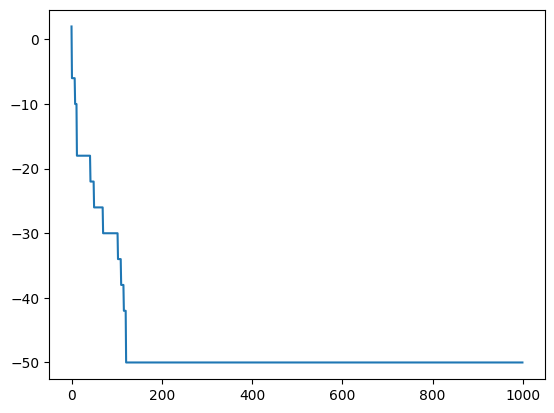

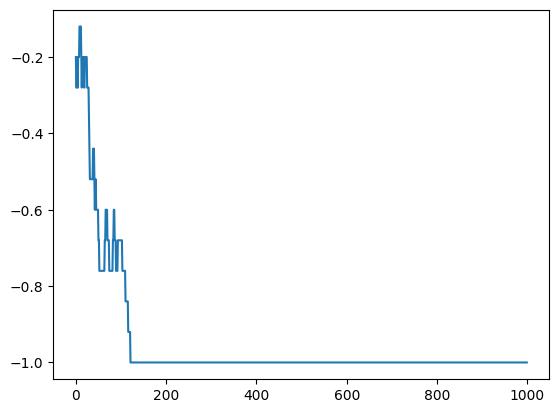

[-0.2, -0.28, -0.28, -0.2, -0.28, -0.2, -0.2, -0.2, -0.12, -0.12, -0.12, -0.12, -0.2, -0.28, -0.2, -0.2, -0.2, -0.2, -0.28, -0.28, -0.2, -0.2, -0.2, -0.2, -0.2, -0.28, -0.28, -0.28, -0.28, -0.36, -0.44, -0.52, -0.52, -0.52, -0.52, -0.52, -0.52, -0.52, -0.44, -0.52, -0.44, -0.52, -0.6, -0.52, -0.52, -0.6, -0.6, -0.6, -0.6, -0.6, -0.68, -0.68, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.68, -0.68, -0.6, -0.6, -0.6, -0.6, -0.68, -0.68, -0.68, -0.68, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.68, -0.68, -0.6, -0.6, -0.68, -0.68, -0.68, -0.76, -0.76, -0.76, -0.76, -0.68, -0.68, -0.68, -0.68, -0.68, -0.68, -0.68, -0.68, -0.68, -0.68, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0.84, -0.84, -0.84, -0.84, -0.84, -0.84, -0.92, -0.92, -0.92, -0.92, -0.92, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 이웃 함수 정의
def neighbor(number, matrix, N):
    # 1차원 인덱스를 2차원 좌표로 변환
    i, j = divmod(number, N)
    # 현재 위치의 값을 self로 설정
    self = matrix[i][j]
    result = []

    # 이웃 값들을 구하여 result 리스트에 추가
    result.append(matrix[(i-1) % N, j])  # 위쪽
    result.append(matrix[(i+1) % N, j])  # 아래쪽
    result.append(matrix[i, (j-1) % N])  # 왼쪽
    result.append(matrix[i, (j+1) % N])  # 오른쪽

    return result, self

# 전체 에너지 계산 함수 정의
def calculate_total_E(matrix, N):
    total_E = 0
    # 모든 위치에 대해 반복
    for i in range(N * N):
        # 이웃 값들과 현재 값을 가져옴
        neighbors, self = neighbor(i, matrix, N)
        # 각 이웃과 현재 값의 상호작용 에너지 합을 계산
        for neighbor_v in neighbors:
            total_E += -neighbor_v * self

    return total_E / 2

N = 5  # 행렬의 크기
beta = 1  # 역온도
T = 1000  # 시뮬레이션 반복 횟수
elist = []  # 에너지 리스트
total = []  # 전체 자화 모멘트 리스트
matrix_u = np.random.choice([-1, 1], size=(N, N))  # N x N 크기의 랜덤 이진 행렬 생성

# Metropolis 알고리즘을 이용한 시뮬레이션
for i in range(T):
    matrix_v = np.copy(matrix_u)
    # 랜덤한 위치의 값을 반전시킴
    i, j = np.random.randint(0, N), np.random.randint(0, N)
    matrix_v[i, j] *= -1
    E_u = calculate_total_E(matrix_u, N)  # 현재 행렬의 에너지 계산
    E_v = calculate_total_E(matrix_v, N)  # 반전된 행렬의 에너지 계산

    # Metropolis 알고리즘 적용
    if E_u >= E_v:
        matrix_u = np.copy(matrix_v)  # 에너지가 낮아지면 항상 반전된 행렬을 수락
        elist.append(E_v)  # 에너지 리스트에 추가
        total.append(np.sum(matrix_u) / (N * N))  # 전체 자화 모멘트 리스트에 추가
    else:
        pb = np.exp(beta * (E_u - E_v))  # 확률적으로 반전된 행렬을 수락할 확률 계산
        if np.random.rand() < pb:
            matrix_u = np.copy(matrix_v)  # 확률적으로 반전된 행렬을 수락
            elist.append(E_v)  # 에너지 리스트에 추가
            total.append(np.sum(matrix_u) / (N * N))  # 전체 자화 모멘트 리스트에 추가
        else:
            elist.append(E_u)  # 반전되지 않은 경우 현재 에너지를 유지
            total.append(np.sum(matrix_u) / (N * N))  # 전체 자화 모멘트 리스트에 추가

# 결과 시각화
plt.plot(elist)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy vs Iteration')
plt.show()

plt.plot(total)
plt.xlabel('Iteration')
plt.ylabel('Total Magnetization')
plt.title('Total Magnetization vs Iteration')
plt.show()

# 최종 결과 출력
print("Total Magnetization:")
print(total)
print("\nEnergy:")
print(elist)


In [ ]:
v